In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

movies_df = pd.read_csv(r'C:\Users\Administrator\Desktop\Studies\Python\Python_Project_Movie_Analysis\Python_Project_Movie_Analysis\0_Dataset\movies_metadata.csv', low_memory= False)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'],errors='coerce') # Convert data type of release_date to datetime.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce') # Convert data type of budget to numeric.
movies_df['imdb_id'] = pd.to_numeric(movies_df['imdb_id'], errors='coerce') # Convert data type of imdb_id to numeric.
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce') # Convert data type of id to numeric.

def list_name(string_list_dict): # Convert the string list of dictionary into list of name.
    list_dict = ast.literal_eval(string_list_dict) if pd.notna(string_list_dict) else string_list_dict
    return [dict['name'] for dict in list_dict] if isinstance(list_dict,list) else []

movies_df['genres'] = movies_df['genres'].apply(lambda x: list_name(x))
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: list_name(x))
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: list_name(x))
movies_df = movies_df.dropna(subset= 'title', axis= 'index')

# What are the most common characteristics of successful movies?

A success movies can be define based on:
1. High Audience Rating (`vote_average` ≥ 8.0 and `vote_count` ≥ 1000)
2. High Profitability (`profit` in Top 10%)
3. Both rating + profit combined

I will going to check the characteristics listed below:

1. Genres
2. Runtime
3. Language
4. Budget
5. Release Year
6. Production Companies
7. Production Countries

### Successfull Movies

In [3]:
movies = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)].copy()
movies['profit'] = movies['revenue'] - movies['budget']
profit_threshold = movies['profit'].quantile(0.90)

succesful_movies = movies[(movies['profit'] > profit_threshold) & (movies['vote_average'] >= 8.0) & (movies['vote_count'] >= 1000)]


### Genres

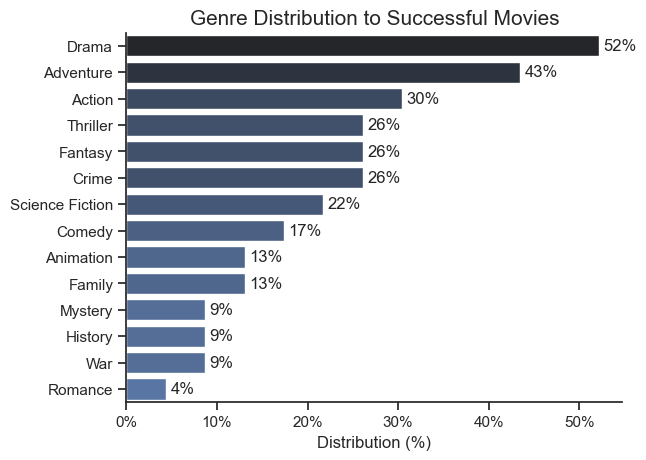

In [4]:
genres_explode = succesful_movies.explode('genres')
movie_count = len(succesful_movies)
genres_count = genres_explode['genres'].value_counts().reset_index()
genres_count['perc'] = genres_count['count']/movie_count * 100

sns.set_theme(style= 'ticks')
sns.barplot(
    data= genres_count
    ,x= 'perc'
    ,y= 'genres'
    ,hue= 'perc'
    ,palette= 'dark:b_r'
    ,legend= False
    )
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x:.0f}%'))
for i,value in enumerate(genres_count['perc']):
    ax.text(
        x= value+.5
        ,y= i
        ,s= f'{value:.0f}%'
        ,va= 'center'
    )
ax.spines[['top','right']].set_visible(False)
ax.set_title('Genre Distribution to Successful Movies', fontsize= 15)
ax.set_xlabel('Distribution (%)')
ax.set_ylabel('')
plt.show()


### Runtime

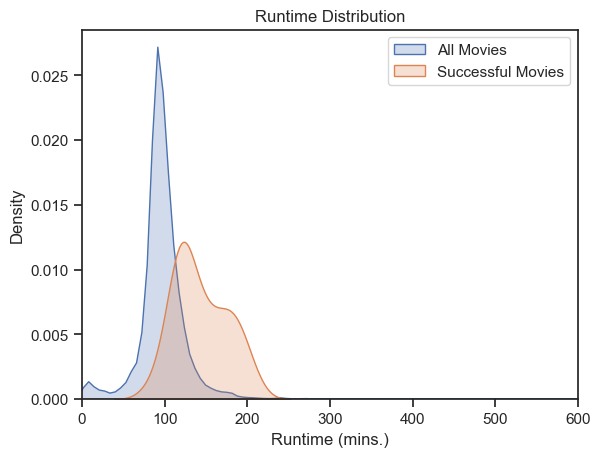

In [20]:
movies_runtime = movies_df[movies_df['runtime'] > 0 ]

sns.kdeplot(movies_runtime['runtime'], label='All Movies', fill=True)
sns.kdeplot(succesful_movies['runtime'], label='Successful Movies', fill=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (mins.)')
plt.xlim(0,600)
plt.legend()